# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [6]:
pip install citipy

  Created wheel for citipy: filename=citipy-0.0.5-py3-none-any.whl size=559707 sha256=7d74d6405e1f4d93809f50fb5dfef5f920be47626761eab8a156c3df9782495b
  Stored in directory: c:\users\quila\appdata\local\pip\cache\wheels\72\ae\63\5d03cf6dfe5c0e9328fb73f8b30da1948a06b9cceaf2c68d2d
Successfully built citipy
Note: you may need to restart the kernel to use updated packages.


In [31]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import scipy.stats as st
from scipy.stats import linregress
from sklearn import datasets

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

617

In [5]:
### Perform API Calls
#* Perform a weather check on each city using a series of successive API calls.
#* Include a print log of each city as it's being processed (with the city number and city name).


In [7]:
# Save config information
url = "http://api.openweathermap.org/data/2.5/weather"

# set up lists to hold response info 

name = []
lat = []
lon = []
temp_max = []
humidity = []
clouds = []
speed = []
country = []


test_cities = cities[0:15]

# Loop through the list of cities and perfor a request for data on each

for city in cities :
    
    # Build query URL
    query_url = url + "?q=" + city + "&appid=" + weather_api_key  
   
    try:
        weather_response = requests.get(query_url)
        response_json = weather_response.json()
        
        name.append(response_json['name'])
        lat.append(response_json['coord']['lat'])
        lon.append(response_json['coord']['lon'])
        temp_max.append(response_json['main']['temp_max'])
        humidity.append(response_json['main']['humidity'])
        clouds.append(response_json['clouds']['all'])
        speed.append(response_json['wind']['speed'])
        country.append(response_json['sys']['country'])
        
        
        
    except:
        print(f'Could not get response for {city}.')
   
print(name)
print(lat)
print(lon)
print(temp_max)
print(humidity)
print(clouds)
print(speed)
print(country)


Could not get response for doctor pedro p. pena.
Could not get response for grand river south east.
Could not get response for illoqqortoormiut.
Could not get response for taolanaro.
Could not get response for nizhneyansk.
Could not get response for navapur.
Could not get response for barentsburg.
Could not get response for wulanhaote.
Could not get response for tarudant.
Could not get response for kawana waters.
Could not get response for attawapiskat.
Could not get response for mys shmidta.
Could not get response for viligili.
Could not get response for gorkovskoye.
Could not get response for borlange.
Could not get response for amderma.
Could not get response for artyk.
Could not get response for urdzhar.
Could not get response for samusu.
Could not get response for sentyabrskiy.
Could not get response for jinchengjiang.
Could not get response for lolua.
Could not get response for marcona.
Could not get response for belushya guba.
Could not get response for stoyba.
Could not get res

In [16]:
print(response_json)

{'coord': {'lon': 80.26, 'lat': 41.12}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02n'}], 'base': 'stations', 'main': {'temp': 297.35, 'feels_like': 295.37, 'temp_min': 297.35, 'temp_max': 297.35, 'pressure': 1008, 'humidity': 26, 'sea_level': 1008, 'grnd_level': 891}, 'visibility': 10000, 'wind': {'speed': 0.81, 'deg': 95}, 'clouds': {'all': 17}, 'dt': 1597606766, 'sys': {'country': 'CN', 'sunrise': 1597621843, 'sunset': 1597671336}, 'timezone': 28800, 'id': 1529660, 'name': 'Aksu', 'cod': 200}


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [13]:
weather_df = pd.DataFrame({
    'City' : name,
    'Latitude' : lat,
    'Longitude' : lon,
    'Max Temp' : temp_max,
    'Humidity' : humidity,
    'Cloudiness' : clouds,
    'Wind Speed' : speed,
    'Country' : country
    })

weather_df.to_csv(r'C:\Users\quila\Desktop\python-api-challenge\WeatherPy\weather_df.csv')
weather_df

,City,Latitude,Longitude,Max Temp,Humidity,Cloudiness,Wind Speed,Country
0,Luohe,33.57,114.04,298.35,89,0,2.04,CN
1,Lagoa,39.05,-27.98,296.63,86,100,11.79,PT
2,Maniitsoq,65.42,-52.90,282.12,65,0,4.94,GL
3,Ushuaia,-54.80,-68.30,274.15,84,75,14.40,AR
4,Jamestown,42.10,-79.24,294.82,77,90,5.10,US
...,...,...,...,...,...,...,...,...
569,Kargopol',61.51,38.95,281.56,88,25,2.47,RU
570,Port Keats,-14.25,129.55,295.11,90,7,0.77,AU
571,Bonthe,7.53,-12.51,297.66,81,100,4.50,SL
572,Ōkuchi-shinohara,32.07,130.62,298.71,83,0,1.79,JP


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [14]:
weather_df.describe()

,Latitude,Longitude,Max Temp,Humidity,Cloudiness,Wind Speed
count,574.000000,574.000000,574.000000,574.000000,574.000000,574.000000
mean,22.030714,17.848415,293.713990,70.045296,50.022648,3.505610
std,32.546147,88.662701,8.577739,21.396646,39.886504,2.467776
min,-54.800000,-179.170000,273.710000,6.000000,0.000000,0.050000
25%,-4.900000,-61.197500,286.187500,58.000000,4.000000,1.902500
50%,27.800000,22.240000,295.150000,76.000000,53.500000,2.900000
75%,49.355000,95.780000,299.820000,87.000000,90.000000,4.600000
max,78.220000,179.320000,316.380000,100.000000,100.000000,14.400000


In [15]:
#  Get the indices of cities that have humidity over 100%.
#N/A

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

<Figure size 432x288 with 0 Axes>

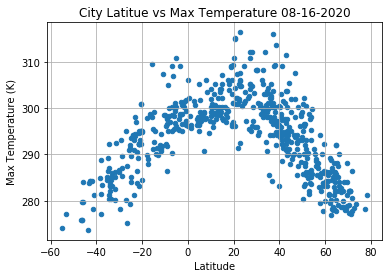

In [58]:
plt.figure()
weather_df.plot(x = 'Latitude', y='Max Temp', kind = 'scatter', marker = 'o')

plt.title('City Latitue vs Max Temperature 08-16-2020')
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (K)")
plt.grid(True)

plt.show()

## Latitude vs. Humidity Plot

<Figure size 432x288 with 0 Axes>

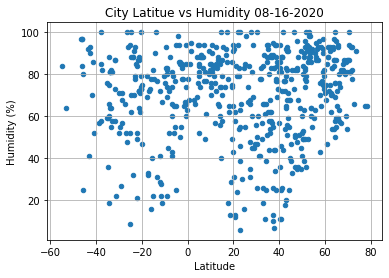

In [59]:
plt.figure()
weather_df.plot(x = 'Latitude', y='Humidity', kind = 'scatter', marker = 'o')

plt.title('City Latitue vs Humidity 08-16-2020')
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)

plt.show()

## Latitude vs. Cloudiness Plot

<Figure size 432x288 with 0 Axes>

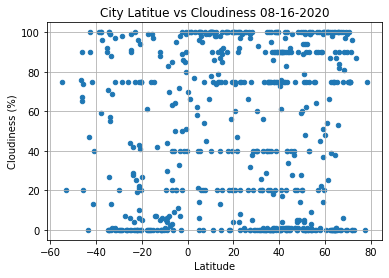

In [60]:
plt.figure()
weather_df.plot(x = 'Latitude', y='Cloudiness', kind = 'scatter', marker = 'o')

plt.title('City Latitue vs Cloudiness 08-16-2020')
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True)

plt.show()

## Latitude vs. Wind Speed Plot

<Figure size 432x288 with 0 Axes>

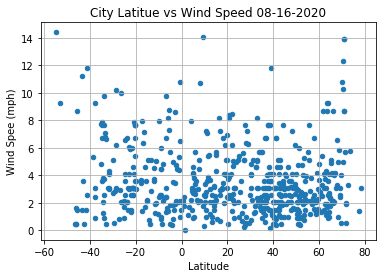

In [61]:
plt.figure()
weather_df.plot(x = 'Latitude', y='Wind Speed', kind = 'scatter', marker = 'o')

plt.title('City Latitue vs Wind Speed 08-16-2020')
plt.xlabel("Latitude")
plt.ylabel("Wind Spee (mph)")
plt.grid(True)

plt.show()

## Linear Regression

In [14]:
# OPTIONAL: Create a function to create Linear Regression plots

In [25]:
# Create Northern and Southern Hemisphere DataFrames
north_df = weather_df[weather_df["Latitude"] >= 0]
south_df = weather_df[weather_df["Latitude"] <= 0]

north_df

,City,Latitude,Longitude,Max Temp,Humidity,Cloudiness,Wind Speed,Country
0,Luohe,33.57,114.04,298.35,89,0,2.04,CN
1,Lagoa,39.05,-27.98,296.63,86,100,11.79,PT
2,Maniitsoq,65.42,-52.90,282.12,65,0,4.94,GL
4,Jamestown,42.10,-79.24,294.82,77,90,5.10,US
8,Tuktoyaktuk,69.45,-133.04,284.15,87,90,3.10,CA
...,...,...,...,...,...,...,...,...
568,Mazatlán,23.22,-106.42,304.82,66,75,3.10,MX
569,Kargopol',61.51,38.95,281.56,88,25,2.47,RU
571,Bonthe,7.53,-12.51,297.66,81,100,4.50,SL
572,Ōkuchi-shinohara,32.07,130.62,298.71,83,0,1.79,JP


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: -0.73


<Figure size 432x288 with 0 Axes>

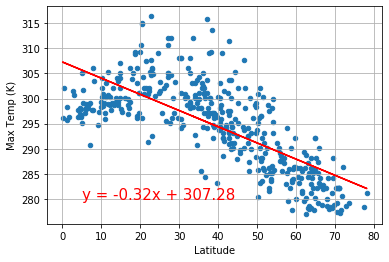

In [34]:
latitude = north_df.iloc[:,1]
maxTemp = north_df.iloc[:,3]
correlation = st.pearsonr(latitude,maxTemp)

plt.figure()



(slope, intercept, rvalue, pvalue, stderr) = linregress(latitude, maxTemp)
regress_values = latitude * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
north_df.plot(x = 'Latitude', y='Max Temp', kind = 'scatter', marker = 'o')

plt.plot(latitude,regress_values,"r-")
plt.annotate(line_eq,(5,280),fontsize=15,color="red")
plt.grid(True)



plt.xlabel('Latitude')
plt.ylabel('Max Temp (K)')
print(f"The r-squared is: {round(correlation[0],2)}")
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.81


<Figure size 432x288 with 0 Axes>

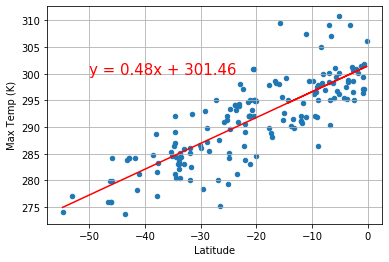

In [39]:
s_latitude = south_df.iloc[:,1]
s_maxTemp = south_df.iloc[:,3]
correlation = st.pearsonr(s_latitude,s_maxTemp)

plt.figure()



(slope, intercept, rvalue, pvalue, stderr) = linregress(s_latitude, s_maxTemp)
regress_values = s_latitude * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
south_df.plot(x = 'Latitude', y='Max Temp', kind = 'scatter', marker = 'o')

plt.plot(s_latitude,regress_values,"r-")
plt.annotate(line_eq,(-50,300),fontsize=15,color="red")
plt.grid(True)



plt.xlabel('Latitude')
plt.ylabel('Max Temp (K)')
print(f"The r-squared is: {round(correlation[0],2)}")
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.07


<Figure size 432x288 with 0 Axes>

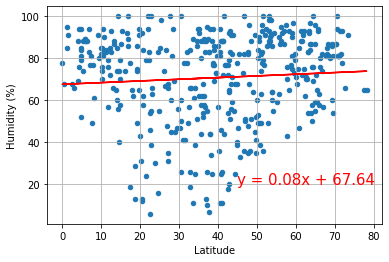

In [42]:
latitude = north_df.iloc[:,1]
humid = north_df.iloc[:,4]
correlation = st.pearsonr(latitude,humid)

plt.figure()



(slope, intercept, rvalue, pvalue, stderr) = linregress(latitude, humid)
regress_values = latitude * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
north_df.plot(x = 'Latitude', y='Humidity', kind = 'scatter', marker = 'o')

plt.plot(latitude,regress_values,"r-")
plt.annotate(line_eq,(45,20),fontsize=15,color="red")
plt.grid(True)



plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
print(f"The r-squared is: {round(correlation[0],2)}")
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: -0.06


<Figure size 432x288 with 0 Axes>

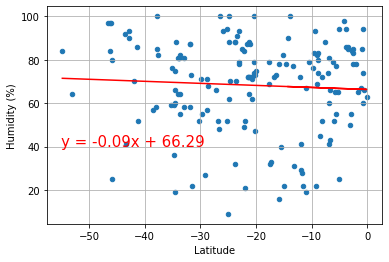

In [44]:
s_latitude = south_df.iloc[:,1]
s_humid = south_df.iloc[:,4]
correlation = st.pearsonr(s_latitude,s_humid)

plt.figure()



(slope, intercept, rvalue, pvalue, stderr) = linregress(s_latitude, s_humid)
regress_values = s_latitude * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
south_df.plot(x = 'Latitude', y='Humidity', kind = 'scatter', marker = 'o')

plt.plot(s_latitude,regress_values,"r-")
plt.annotate(line_eq,(-55,40),fontsize=15,color="red")
plt.grid(True)



plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
print(f"The r-squared is: {round(correlation[0],2)}")
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: -0.11


<Figure size 432x288 with 0 Axes>

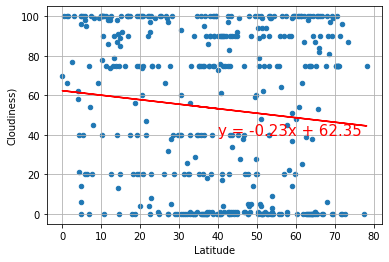

In [47]:
latitude = north_df.iloc[:,1]
cloudy = north_df.iloc[:,5]
correlation = st.pearsonr(latitude,cloudy)

plt.figure()



(slope, intercept, rvalue, pvalue, stderr) = linregress(latitude, cloudy)
regress_values = latitude * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
north_df.plot(x = 'Latitude', y='Cloudiness', kind = 'scatter', marker = 'o')

plt.plot(latitude,regress_values,"r-")
plt.annotate(line_eq,(40,40),fontsize=15,color="red")
plt.grid(True)



plt.xlabel('Latitude')
plt.ylabel('Cloudiness)')
print(f"The r-squared is: {round(correlation[0],2)}")
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: -0.11


<Figure size 432x288 with 0 Axes>

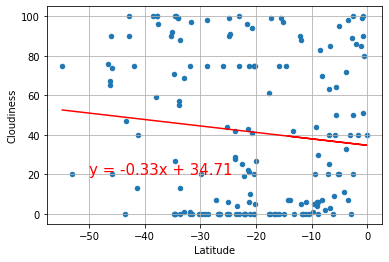

In [52]:
s_latitude = south_df.iloc[:,1]
s_cloud = south_df.iloc[:,5]
correlation = st.pearsonr(s_latitude,s_cloud )

plt.figure()



(slope, intercept, rvalue, pvalue, stderr) = linregress(s_latitude, s_cloud )
regress_values = s_latitude * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
south_df.plot(x = 'Latitude', y='Cloudiness', kind = 'scatter', marker = 'o')

plt.plot(s_latitude,regress_values,"r-")
plt.annotate(line_eq,(-50,20),fontsize=15,color="red")
plt.grid(True)



plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
print(f"The r-squared is: {round(correlation[0],2)}")
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.05


<Figure size 432x288 with 0 Axes>

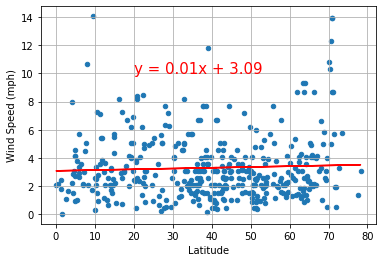

In [54]:
latitude = north_df.iloc[:,1]
speed = north_df.iloc[:,6]
correlation = st.pearsonr(latitude,speed)

plt.figure()



(slope, intercept, rvalue, pvalue, stderr) = linregress(latitude, speed)
regress_values = latitude * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
north_df.plot(x = 'Latitude', y='Wind Speed', kind = 'scatter', marker = 'o')

plt.plot(latitude,regress_values,"r-")
plt.annotate(line_eq,(20,10),fontsize=15,color="red")
plt.grid(True)



plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
print(f"The r-squared is: {round(correlation[0],2)}")
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: -0.14


<Figure size 432x288 with 0 Axes>

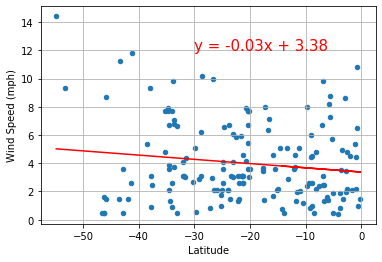

In [57]:
s_latitude = south_df.iloc[:,1]
s_speed = south_df.iloc[:,6]
correlation = st.pearsonr(s_latitude,s_speed)

plt.figure()



(slope, intercept, rvalue, pvalue, stderr) = linregress(s_latitude, s_speed)
regress_values = s_latitude * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
south_df.plot(x = 'Latitude', y='Wind Speed', kind = 'scatter', marker = 'o')

plt.plot(s_latitude,regress_values,"r-")
plt.annotate(line_eq,(-30,12),fontsize=15,color="red")
plt.grid(True)



plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
print(f"The r-squared is: {round(correlation[0],2)}")
plt.show()